Importing the required libraries

In [1]:
import matplotlib.pyplot as plt # to draw charts
%pylab inline
import pandas as pd #to load data
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Load the data

In [2]:
data = pd.read_table("game_reviews.txt",encoding="utf-8")
print data.columns
print data.shape

Index([u'Unnamed: 0', u'id', u'title', u'author', u'date', u'type', u'stars', u'text'], dtype='object')
(45025, 8)


Subset the data - only keeping review text and associated stars

In [3]:
reviews = pd.DataFrame({'reviews': data.text, 'stars': data.stars})
print reviews.columns
print reviews.shape
print reviews.reviews[1]
print reviews.stars[1]

Index([u'reviews', u'stars'], dtype='object')
(45025, 2)
It's really candy crush.  It's so much prettier than the bootleg version I put on my kindle!!  So glad it's finally here.
5


Importing the `RawDocs` class needed to process text

In [7]:
%run RawDocs_Stefano.py #change this to final name of ex1 class

Generate object of the `RawDocs` class which will have the methods required for the analysis, i.e. `count` and `tf_idf`.

In [8]:
text = RawDocs(reviews.reviews,'stopwords.txt')

__Question (a)__

Apply `count` and `tf_idf` methods. We use a Harvard-IV dictionary that contains words intended to capture enjoyment plus some additional positive words proposed in [Most common words unique to 1-star and 5-star App Store reviews](http://www.marco.org/2010/09/12/most-common-words-unique-to-1-star-and-5-star-app-store). As the analysis is applied to reviews of a mobile game, this type of dictionary should capture the extent to which each review expresses this feeling.

In [16]:
%timeit text.count("Enjoyment_dictionary_plus.txt")
%timeit text.tf_idf("Enjoyment_dictionary_plus.txt")

1 loops, best of 3: 16.6 s per loop
1 loops, best of 3: 18.2 s per loop


Among the arrays of counts, each of the two methods also generates a vector of document scores (one score for each of the documents contained in the corpus.)

In [10]:
print text.dictionary_scores.shape
print text.tf_idf_scores.shape

(45025L,)
(45025L,)


__Question (b)__

We explore the correlation between review scores and stars using scatter plots. To facilitate the comparison of the scores, first we normalise them so that they would range from 0 to 1.


In [11]:
dict_scores_norm = text.dictionary_scores / sum(text.dictionary_scores)
tf_idf_scores_norm = text.tf_idf_scores / sum(text.tf_idf_scores)

We consider the __unweighted__ dictionary scores first:

The score of the documents are separated by number of stars rating. For each star rating we get the mean score and the standard deviation.

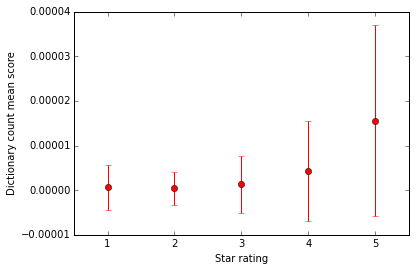

In [12]:
mean_dict_scores_norm_by_stars = list()
std_dict_scores_norm_by_stars = list()
stars = [1,2,3,4,5]
for i in stars:
    mean_dict_scores_norm_by_stars.append(
        np.mean(np.where(reviews.stars == i,1,0)*dict_scores_norm))
    std_dict_scores_norm_by_stars.append(
        np.std(np.where(reviews.stars == i,1,0)*dict_scores_norm))
    
plt.errorbar(stars,mean_dict_scores_norm_by_stars, yerr=std_dict_scores_norm_by_stars, fmt='or')
plt.xlim(0.5,5.5)
plt.ylim(-1e-5,4e-5)
plt.xlabel('Star rating')
plt.ylabel('Dictionary count mean score')

The correlation between star ratings and scores in this case is:

In [13]:
np.corrcoef(reviews.stars,dict_scores_norm)

array([[ 1.        ,  0.12506771],
       [ 0.12506771,  1.        ]])

We then considered the __tf-idf weighted__ scores by repeating the same procedure as before.

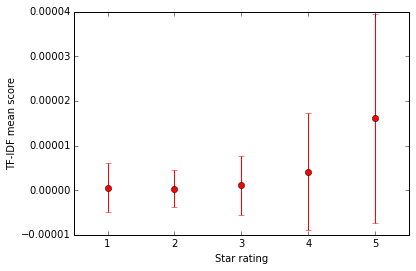

In [14]:
mean_tf_idf_norm_by_stars = list()
std_tf_idf_norm_by_stars = list()
stars = [1,2,3,4,5]
for i in stars:
    mean_tf_idf_norm_by_stars.append(
        np.mean(np.where(reviews.stars == i,1,0)*tf_idf_scores_norm))
    std_tf_idf_norm_by_stars.append(
        np.std(np.where(reviews.stars == i,1,0)*tf_idf_scores_norm))
    
plt.errorbar(stars,mean_tf_idf_norm_by_stars, yerr=std_tf_idf_norm_by_stars, fmt='or')
plt.xlim(0.5,5.5)
plt.ylim(-1e-5,4e-5)
plt.xlabel('Star rating')
plt.ylabel('TF-IDF mean score')

The correlation between star ratings and scores in this case is:

In [15]:
np.corrcoef(reviews.stars,tf_idf_scores_norm)

array([[ 1.        ,  0.15611489],
       [ 0.15611489,  1.        ]])

__Question (c)__

The charts show a small difference between the two methods. Specifically, when using the __tf-idf weighted__ scores the correlation between the text score and the star rating increase, albeit marginally.

Both results suggest that there is a consistent star rating scale across reviewers. The only exception is the case of 1 star that shows a mean score slightly larger than the value for 2 stars. That can be due to inconsistencies (e.g. 1 stars for one reviewer could be equivalent to 2 stars for another reviewer), due to a psychological bias towards the lowest value or as a result of some boycott of the competitors.

The __tf_idf__ scoring helps extracting the meaning of the review thus making the weak link betweeen reviews and star rating even more obvious.